In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# importing data
df = pd.read_csv("C:/Users/New User/Desktop/Fraud/data/fraudTrain.csv", skipinitialspace = True)
df = df.sample(n=10000) #sampling 10k from 1m dataset
df.shape

(10000, 23)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 562386 to 1296176
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   trans_date_trans_time  10000 non-null  object 
 2   cc_num                 10000 non-null  int64  
 3   merchant               10000 non-null  object 
 4   category               10000 non-null  object 
 5   amt                    10000 non-null  float64
 6   first                  10000 non-null  object 
 7   last                   10000 non-null  object 
 8   gender                 10000 non-null  object 
 9   street                 10000 non-null  object 
 10  city                   10000 non-null  object 
 11  state                  10000 non-null  object 
 12  zip                    10000 non-null  int64  
 13  lat                    10000 non-null  float64
 14  long                   10000 non-null  float64


In [4]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
562386,562386,2019-08-27 07:44:28,4464457352619,"fraud_Bernier, Volkman and Hoeger",misc_net,6.58,Breanna,Rodriguez,F,118 Cabrera Springs Apt. 105,...,29.8826,-84.5964,217,Television production assistant,1990-01-24,8b8eb027a91e80f9f881fad780febdd1,1346053468,29.289629,-83.971627,0
558581,558581,2019-08-26 03:45:11,340103199302564,fraud_Bailey-Morar,grocery_pos,106.10,Sophia,Dickson,F,9047 Rodriguez Turnpike,...,36.1183,-79.5685,12486,Arboriculturist,1934-02-09,57b8a4c3d312c296b750ef30200e2869,1345952711,36.309823,-80.418442,0
482980,482980,2019-07-30 06:50:32,377654590313960,fraud_Ledner-Pfannerstill,gas_transport,80.15,Lawrence,Davis,M,7421 Serrano Lane Apt. 580,...,36.0435,-84.0400,25459,"Teacher, special educational needs",1969-02-22,59377bf6ac06d0361efcaccf071aa3d6,1343631032,35.812157,-84.217639,0


In [5]:
df.to_csv("C:/Users/New User/Desktop/Fraud/data/data2.csv")

# General clean-up

In [8]:
# turn all string values into lowercase
df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [9]:
df.state.head(5)

562386    fl
558581    nc
482980    tn
672820    tn
440853    ca
Name: state, dtype: object

In [10]:
df.to_csv("C:/Users/New User/Desktop/Fraud/data/data2.csv")

In [11]:
# checking for duplicated rows except for first occurence
duplicated_rows_df = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicated_rows_df)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


In [15]:
df.duplicated(subset=None, keep='first')

562386     False
558581     False
482980     False
672820     False
440853     False
           ...  
1089184    False
1023814    False
1105947    False
1091954    False
1296176    False
Length: 10000, dtype: bool

In [16]:
# NO DUPLICATES

In [17]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
562386,562386,2019-08-27 07:44:28,4464457352619,"fraud_bernier, volkman and hoeger",misc_net,6.58,breanna,rodriguez,f,118 cabrera springs apt. 105,...,29.8826,-84.5964,217,television production assistant,1990-01-24,8b8eb027a91e80f9f881fad780febdd1,1346053468,29.289629,-83.971627,0
558581,558581,2019-08-26 03:45:11,340103199302564,fraud_bailey-morar,grocery_pos,106.10,sophia,dickson,f,9047 rodriguez turnpike,...,36.1183,-79.5685,12486,arboriculturist,1934-02-09,57b8a4c3d312c296b750ef30200e2869,1345952711,36.309823,-80.418442,0
482980,482980,2019-07-30 06:50:32,377654590313960,fraud_ledner-pfannerstill,gas_transport,80.15,lawrence,davis,m,7421 serrano lane apt. 580,...,36.0435,-84.0400,25459,"teacher, special educational needs",1969-02-22,59377bf6ac06d0361efcaccf071aa3d6,1343631032,35.812157,-84.217639,0
672820,672820,2019-10-13 20:46:18,30131826429364,fraud_gaylord-powlowski,home,57.18,brianna,foley,f,57256 raymond ports,...,35.9335,-84.1481,391389,"designer, industrial/product",1994-04-22,27d98e69e342db3a5dc851ecd771db47,1350161178,35.491402,-83.979976,0
440853,440853,2019-07-15 11:27:57,2576709887791552,fraud_fisher-schowalter,shopping_net,52.78,joseph,morgan,m,126 underwood drive,...,33.0067,-117.0690,1241364,chartered public finance accountant,1959-08-05,89d5c18ca6b8564d49c0fdf16e7c9960,1342351677,32.676211,-117.471314,0


# visualizing using pairplots for 1000 samples

In [18]:
# Define all features
orig_feats = [col for col in df.columns if 'is_fraud' not in col]

len(orig_feats)

22

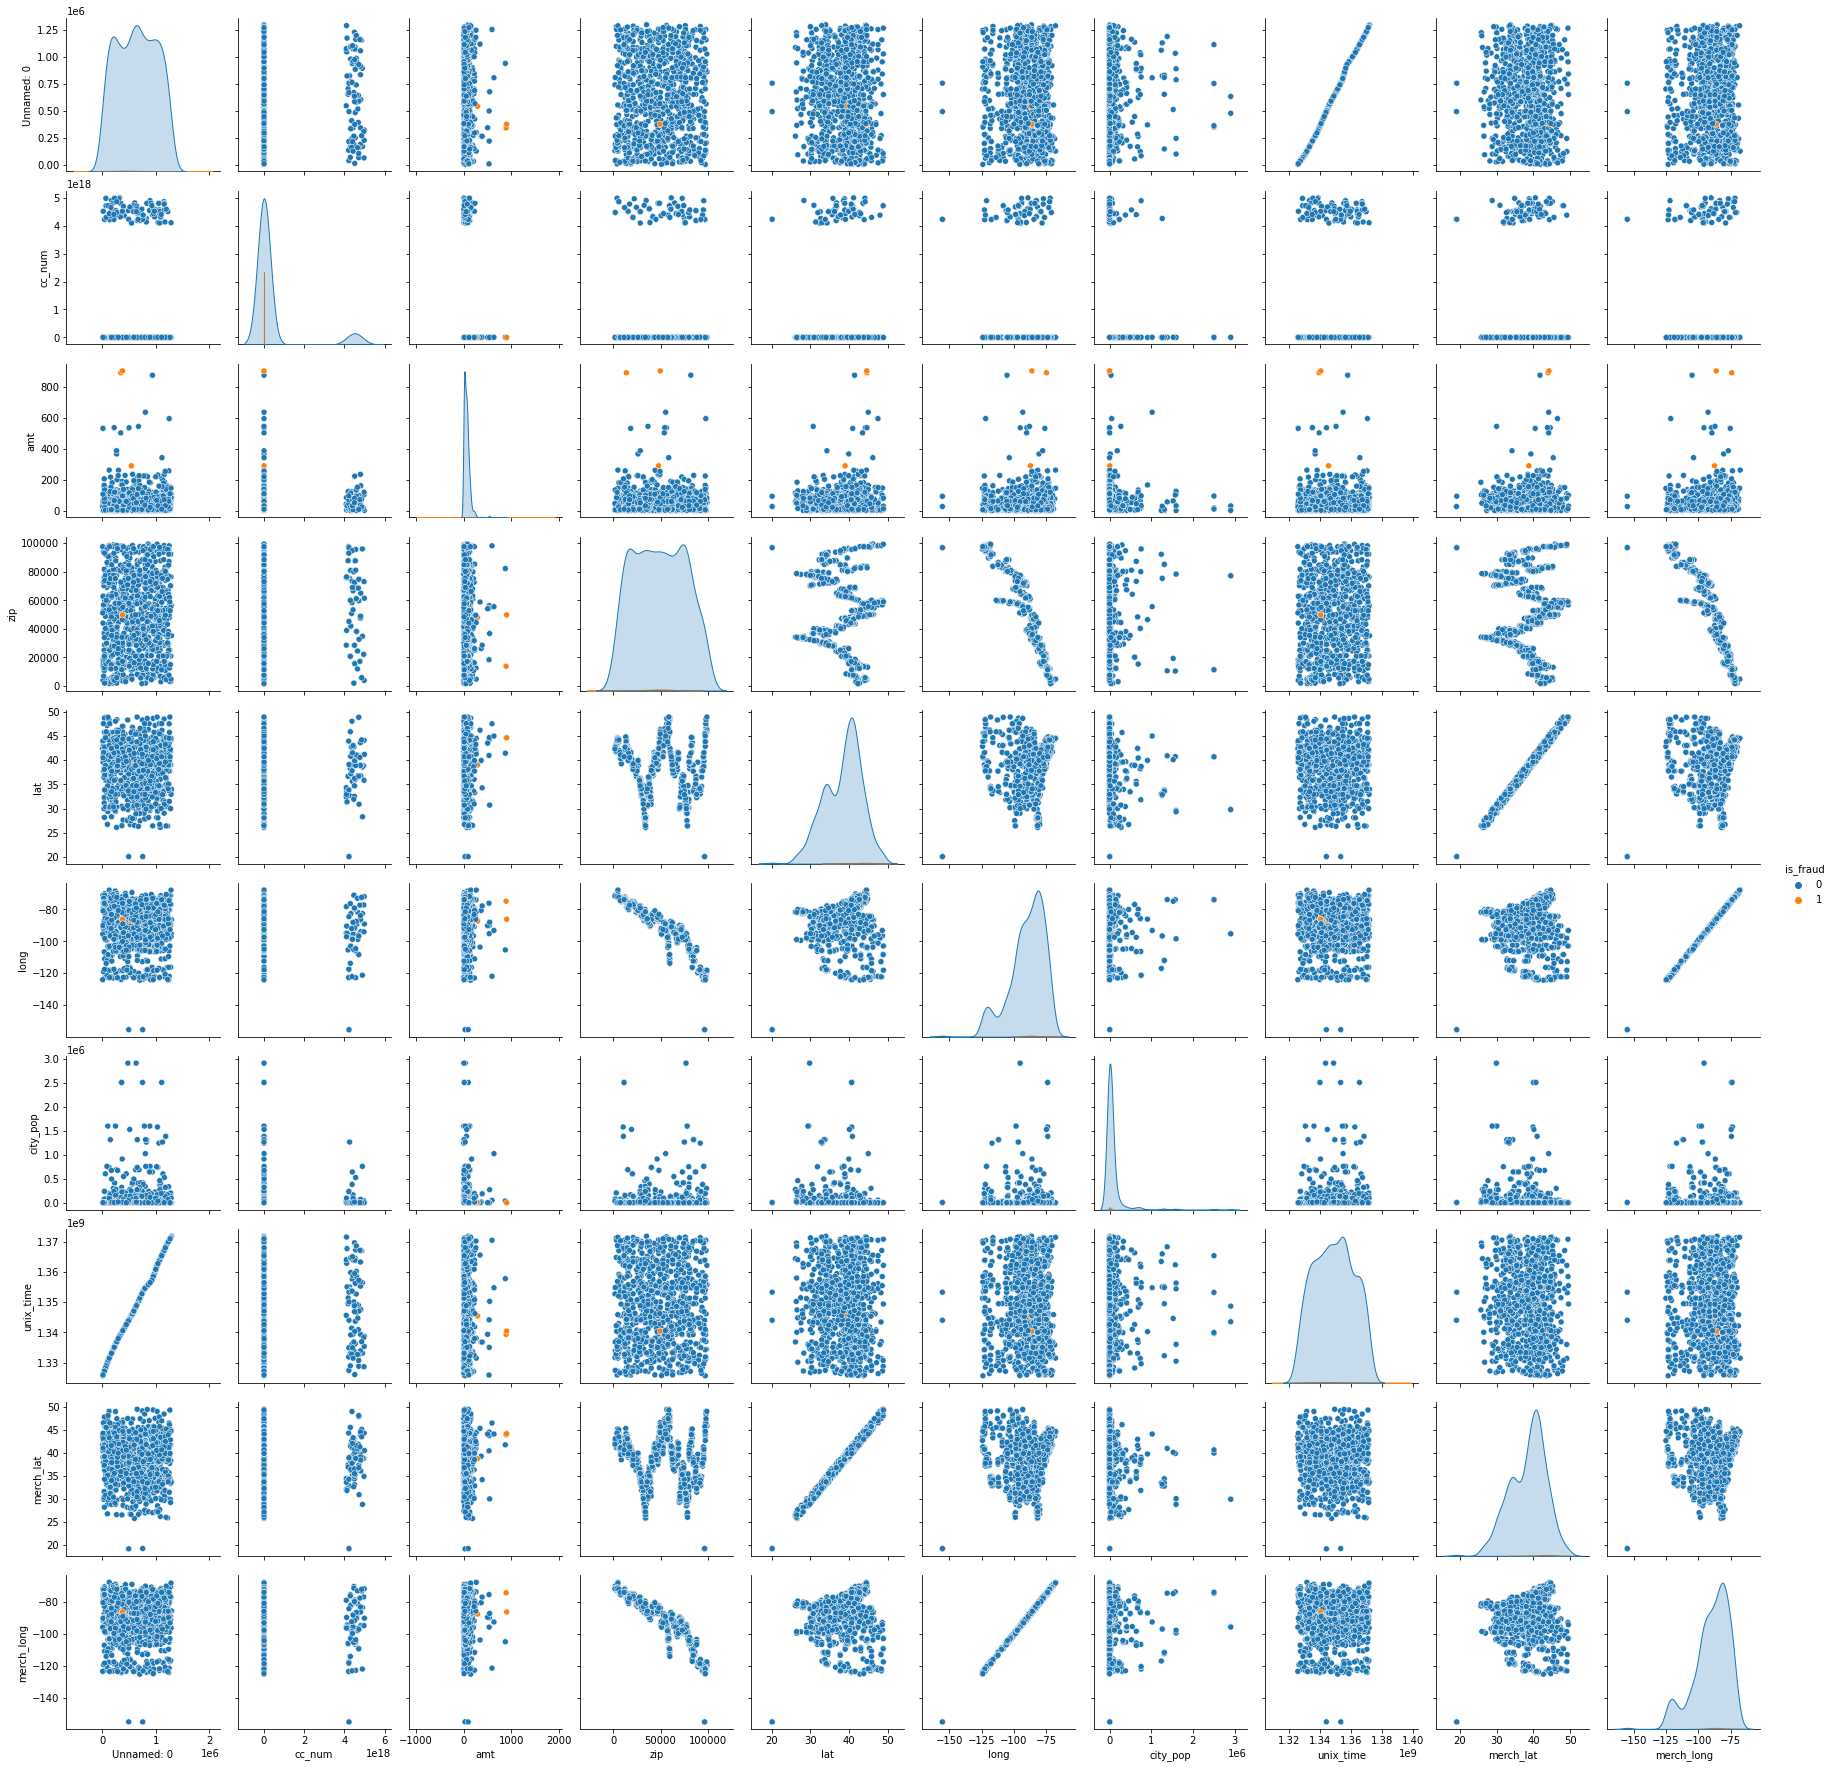

In [21]:
import seaborn as sns
sns_pairplot = sns.pairplot(df[orig_feats[:22]+['is_fraud']].sample(1000, random_state=1), hue='is_fraud')

In [1]:
import matplotlib.pyplot as plt

In [28]:

sns_pairplot.figure.savefig("C:/Users/New User/Desktop/Fraud/sns_pairplot_2.png")

In [29]:
# it seems the fraud cases (orange balls) tend to be around $1000 in amount. See 3rd column. 

In [30]:
# features selected for baseline modeling: amt, cc_num, zip, lat, long. Target is is_fraud. 

In [31]:
df.nunique()

Unnamed: 0               10000
trans_date_trans_time     9997
cc_num                     915
merchant                   693
category                    14
amt                       6708
first                      338
last                       466
gender                       2
street                     915
city                       843
state                       50
zip                        904
lat                        902
long                       903
city_pop                   827
job                        476
dob                        901
trans_num                10000
unix_time                 9997
merch_lat                 9998
merch_long               10000
is_fraud                     2
dtype: int64

# Analyze Fraudulent Amounts Characteristics

In [2]:
df = pd.read_csv("C:/Users/New User/Desktop/Fraud/data/data2.csv")

In [3]:
df.amt.max() # MAX AMOUNT (both fraud and non-fraud)

6996.39

In [4]:
df.amt.median() # MEDIAN AMOUNT (both fraud and non-fraud)

47.224999999999994

In [10]:
df.head()

,Unnamed: 0,Unnamed: 0.1,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,562386,562386,2019-08-27 07:44:28,4464457352619,"fraud_bernier, volkman and hoeger",misc_net,6.58,breanna,rodriguez,f,...,29.8826,-84.5964,217,television production assistant,1990-01-24,8b8eb027a91e80f9f881fad780febdd1,1346053468,29.289629,-83.971627,0
1,558581,558581,2019-08-26 03:45:11,340103199302564,fraud_bailey-morar,grocery_pos,106.10,sophia,dickson,f,...,36.1183,-79.5685,12486,arboriculturist,1934-02-09,57b8a4c3d312c296b750ef30200e2869,1345952711,36.309823,-80.418442,0
2,482980,482980,2019-07-30 06:50:32,377654590313960,fraud_ledner-pfannerstill,gas_transport,80.15,lawrence,davis,m,...,36.0435,-84.0400,25459,"teacher, special educational needs",1969-02-22,59377bf6ac06d0361efcaccf071aa3d6,1343631032,35.812157,-84.217639,0
3,672820,672820,2019-10-13 20:46:18,30131826429364,fraud_gaylord-powlowski,home,57.18,brianna,foley,f,...,35.9335,-84.1481,391389,"designer, industrial/product",1994-04-22,27d98e69e342db3a5dc851ecd771db47,1350161178,35.491402,-83.979976,0
4,440853,440853,2019-07-15 11:27:57,2576709887791552,fraud_fisher-schowalter,shopping_net,52.78,joseph,morgan,m,...,33.0067,-117.0690,1241364,chartered public finance accountant,1959-08-05,89d5c18ca6b8564d49c0fdf16e7c9960,1342351677,32.676211,-117.471314,0


In [5]:
# let's analyze fraud amounts in dataframe by extracting fraudulent amounts
def return_fraud_amts():
    fraud_amts = []
    for i, val in enumerate(df.is_fraud):
        if val == 1:
            fraud_amts.append(df.iloc[i, 6])
    return fraud_amts

In [6]:
return_fraud_amts()

[333.28,
 319.4,
 256.7,
 306.78,
 233.95,
 10.93,
 1154.81,
 241.99,
 17.67,
 967.36,
 944.46,
 18.47,
 805.72,
 289.75,
 23.2,
 719.27,
 719.82,
 846.35,
 6.9,
 498.86,
 19.58,
 303.13,
 1376.04,
 345.57,
 802.24,
 49.1,
 18.2,
 993.47,
 1105.42,
 916.31,
 229.85,
 1079.64,
 1010.74,
 9.66,
 320.57,
 954.72,
 773.21,
 747.73,
 890.74,
 124.71,
 18.81,
 867.28,
 853.5,
 902.67,
 921.46,
 20.49,
 750.36,
 627.95,
 1195.5,
 16.98,
 795.17,
 875.86,
 8.7,
 974.6,
 103.9,
 1050.5,
 772.04,
 18.8,
 869.29,
 1092.68]

In [7]:
len(return_fraud_amts()) # 60 FRAUD CASES

60

In [8]:
import statistics as stat

In [29]:
stat.median(return_fraud_amts()) # MEDIAN FRAUD AMOUNT IS $719.5

719.5450000000001

In [11]:
stat.mean(return_fraud_amts()) # AVERAGE FRAUD AMOUNT IS $558.714

558.714

In [13]:
max(return_fraud_amts()) # MAX FRAUD AMOUNT IS $1376.04

1376.04

In [15]:
min(return_fraud_amts()) # MIN FRAUD AMOUNT IS $6.9

6.9

In [30]:
stat.mode(return_fraud_amts()) # MODE FRAUD AMOUNT IS $333.3

333.28

In [31]:
fraud_df = return_fraud_amts()

In [33]:
fraud_df

[333.28,
 319.4,
 256.7,
 306.78,
 233.95,
 10.93,
 1154.81,
 241.99,
 17.67,
 967.36,
 944.46,
 18.47,
 805.72,
 289.75,
 23.2,
 719.27,
 719.82,
 846.35,
 6.9,
 498.86,
 19.58,
 303.13,
 1376.04,
 345.57,
 802.24,
 49.1,
 18.2,
 993.47,
 1105.42,
 916.31,
 229.85,
 1079.64,
 1010.74,
 9.66,
 320.57,
 954.72,
 773.21,
 747.73,
 890.74,
 124.71,
 18.81,
 867.28,
 853.5,
 902.67,
 921.46,
 20.49,
 750.36,
 627.95,
 1195.5,
 16.98,
 795.17,
 875.86,
 8.7,
 974.6,
 103.9,
 1050.5,
 772.04,
 18.8,
 869.29,
 1092.68]

# Features Of Baseline Model: 1) amt, 2) category, 3) trans_year, 4) trans_month, 5) trans_day

# Converting "trans_date_trans_time" into 3) trans_year, 4) trans_month, 5) and trans_day

In [34]:
import datetime as dt
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time']).dt.date
df['trans_year'] = pd.to_datetime(df['trans_date']).dt.year
df['trans_month'] = pd.to_datetime(df['trans_date']).dt.month
df['trans_day'] = pd.to_datetime(df['trans_date']).dt.day

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   Unnamed: 0.1           10000 non-null  int64  
 2   trans_date_trans_time  10000 non-null  object 
 3   cc_num                 10000 non-null  int64  
 4   merchant               10000 non-null  object 
 5   category               10000 non-null  object 
 6   amt                    10000 non-null  float64
 7   first                  10000 non-null  object 
 8   last                   10000 non-null  object 
 9   gender                 10000 non-null  object 
 10  street                 10000 non-null  object 
 11  city                   10000 non-null  object 
 12  state                  10000 non-null  object 
 13  zip                    10000 non-null  int64  
 14  lat                    10000 non-null  float64
 15  lon

# Categories with most fraudulent cases

In [36]:
category_counts = dict(zip(df.category.unique(), df.category.value_counts()))

In [37]:
category_counts

{'misc_net': 1053,
 'grocery_pos': 1008,
 'gas_transport': 941,
 'home': 859,
 'shopping_net': 847,
 'food_dining': 794,
 'kids_pets': 733,
 'shopping_pos': 719,
 'personal_care': 679,
 'travel': 637,
 'entertainment': 582,
 'health_fitness': 473,
 'misc_pos': 347,
 'grocery_net': 328}

In [38]:
df_fraud = df[df['is_fraud'] == 1]
df_fraud.count()

Unnamed: 0               60
Unnamed: 0.1             60
trans_date_trans_time    60
cc_num                   60
merchant                 60
category                 60
amt                      60
first                    60
last                     60
gender                   60
street                   60
city                     60
state                    60
zip                      60
lat                      60
long                     60
city_pop                 60
job                      60
dob                      60
trans_num                60
unix_time                60
merch_lat                60
merch_long               60
is_fraud                 60
trans_date               60
trans_year               60
trans_month              60
trans_day                60
dtype: int64

In [39]:
fraud_category_counts = dict(zip(df_fraud.category.unique(), df_fraud.category.value_counts()))
fraud_category_counts

{'grocery_pos': 14,
 'home': 10,
 'travel': 8,
 'shopping_pos': 8,
 'gas_transport': 4,
 'shopping_net': 4,
 'kids_pets': 3,
 'misc_net': 2,
 'entertainment': 2,
 'personal_care': 2,
 'health_fitness': 1,
 'food_dining': 1,
 'misc_pos': 1}

In [40]:
df_fraud_amt = df_fraud[['category', 'amt']]
df_fraud_amt

,category,amt
262,grocery_pos,333.28
446,grocery_pos,319.40
540,grocery_pos,256.70
545,grocery_pos,306.78
647,home,233.95
714,travel,10.93
740,shopping_pos,1154.81
780,home,241.99
838,gas_transport,17.67
861,shopping_net,967.36


In [52]:
df_fraud_amt.category.value_counts()

shopping_net      14
shopping_pos      10
grocery_pos        8
misc_net           8
gas_transport      4
kids_pets          4
home               3
personal_care      2
health_fitness     2
food_dining        2
travel             1
entertainment      1
misc_pos           1
Name: category, dtype: int64

In [17]:
df_fraud_amt = pd.read_csv("C:/Users/New User/Desktop/Fraud/data/fraud_amt_df.csv")

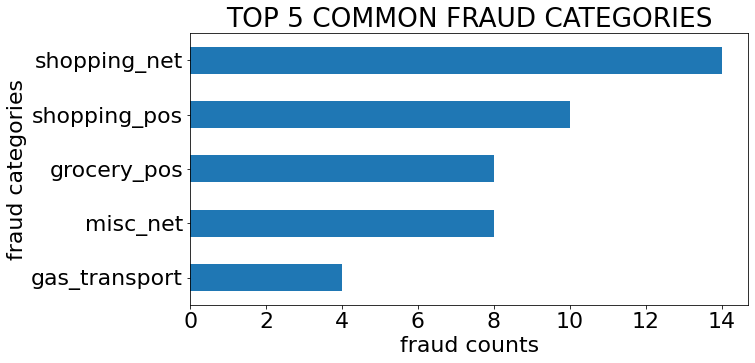

<Figure size 432x288 with 0 Axes>

In [28]:
# distribution graph with top 5 common fraud categories
import matplotlib.pyplot as plt
my_list = (df_fraud_amt['category'].value_counts())
ax = my_list.head(5).plot(kind='barh', stacked=True, figsize=(10, 5))
ax.invert_yaxis()
plt.ylabel('fraud categories')
plt.xlabel('fraud counts')
plt.title('TOP 5 COMMON FRAUD CATEGORIES')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("C:/Users/New User/Desktop/Fraud/top_5_fraud_cats.png", dpi=300)

In [29]:
df_fraud_amt.amt.median()

719.5450000000001

In [30]:
df_fraud_amt.amt.mean()

558.7139999999999

In [31]:
df_fraud_high_amt = df_fraud_amt['amt'] > 550
df_fraud_high_df = df_fraud_amt[df_fraud_high_amt]

In [98]:
df_fraud_high_df.to_csv("C:/Users/New User/Desktop/Fraud/data/fraud_amt_highest_df.csv")

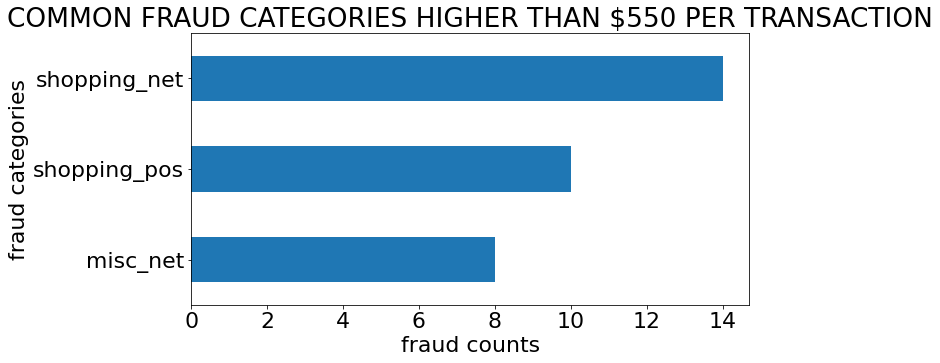

<Figure size 432x288 with 0 Axes>

In [34]:
# distribution graph with categories with highest fraud amounts

my_list = (df_fraud_high_df['category'].value_counts())
ax = my_list.head(5).plot(kind='barh', stacked=True, figsize=(10, 5))
ax.invert_yaxis()
plt.ylabel('fraud categories')
plt.xlabel('fraud counts')
plt.title('COMMON FRAUD CATEGORIES HIGHER THAN $550 PER TRANSACTION')

fig1 = plt.gcf()
plt.show()
plt.draw();
fig1.savefig("C:/Users/New User/Desktop/Fraud/top_3_fraud_cats_highest.png", dpi=300)

In [145]:
df_amt_sorted = df_fraud.sort_values('amt', ascending=False)
df_amt_sorted

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_year,trans_month,trans_day
1262544,1262544,2020-06-08 22:14:13,3562793934111141,fraud_kuhn llc,shopping_pos,1376.04,meagan,edwards,f,10376 bullock rapid,...,1997-04-17,9a7f96694d672499c10b6085fadecd30,1370729653,38.004592,-75.446751,1,2020-06-08,2020,6,8
924676,924676,2019-12-31 22:57:31,571465035400,"fraud_towne, greenholt and koepp",shopping_net,1195.50,louis,fisher,m,45654 hess rest,...,1976-02-26,9a36d90c9db333e58c1e9a9fb054ffb5,1356994651,42.375852,-108.048795,1,2019-12-31,2019,12,31
151098,151098,2019-03-22 18:57:51,4076173495454,fraud_jacobi and sons,shopping_pos,1154.81,bradley,adkins,m,362 brown wall,...,1996-04-01,d5cc7cd97dbb2e0b452785a204432bd5,1332442671,67.441518,-153.653849,1,2019-03-22,2019,3,22
64129,64129,2019-02-07 16:14:19,577891228931,fraud_medhurst plc,shopping_net,1105.42,lisa,carpenter,f,48437 english ways suite 579,...,1961-06-16,b8303ea1cbd8a070b8160cffb6292bd3,1328631259,45.594707,-117.573818,1,2019-02-07,2019,2,7
4727,4727,2019-01-03 23:29:57,4613314721966,fraud_lemke-gutmann,shopping_net,1092.68,jason,murphy,m,542 steve curve suite 011,...,1988-09-15,d7a512888741e0585a7277b2d1bc8348,1325633397,36.981465,-80.767836,1,2019-01-03,2019,1,3
38477,38477,2019-01-23 03:41:24,344709867813900,fraud_price inc,shopping_net,1079.64,joanna,hudson,f,2924 bobby trafficway,...,1986-01-30,30388b8e060e5c8a908b8f86e2f5cfa8,1327290084,27.561984,-81.236425,1,2019-01-23,2019,1,23
1273054,1273054,2020-06-12 23:50:13,4640395708703,fraud_schumm plc,shopping_net,1050.50,melissa,krause,f,67632 martin gateway,...,1951-06-13,4b0bbcddf2d12e8989dbe58241ec107f,1371081013,30.032634,-92.121350,1,2020-06-12,2020,6,12
95670,95670,2019-02-25 22:55:47,3543885983111461,"fraud_romaguera, cruickshank and greenholt",shopping_net,1010.74,colleen,morris,f,89650 patricia turnpike,...,1937-04-16,5a8a5861a1e87b8e0cb2fdf235d45262,1330210547,40.777480,-73.041467,1,2019-02-25,2019,2,25
622366,622366,2019-09-21 23:34:25,3565943051129759,fraud_metz-boehm,shopping_pos,993.47,david,thomas,m,838 dan haven suite 003,...,1963-05-23,7553d79bae46bc591bd9afbee81316b3,1348270465,42.544577,-94.456165,1,2019-09-21,2019,9,21
993232,993232,2020-02-09 23:20:00,2713913904780408,fraud_metz-boehm,shopping_pos,974.60,jacqueline,howard,f,4511 choi lock,...,1964-02-13,8979bfb51d531d56c1d64bcd775b066b,1360452000,32.014805,-91.448176,1,2020-02-09,2020,2,9


In [146]:
#  TOP 7 FRAUD CATEGORIES:
    
#  1) 'grocery_pos': 14,
#  2) 'home': 10,
#  3) 'travel': 8,
#  4) 'shopping_pos': 8, *
#  5) 'gas_transport': 4,
#  6) 'shopping_net': 4, *
#  7) 'misc_net' *

# TOP 3 FRAUD CATEGORIES WITH AMOUNT GREATER THAN $600
# 1) 'misc_net'
# 2) 'shopping_pos'
# 3) 'shopping_net'

In [147]:
df.to_csv("C:/Users/New User/Desktop/Fraud/data/data2_1.csv")

# One-Hot Encode "Category"

In [150]:
df.category.value_counts().sort_values(ascending=False).head(14)

gas_transport     1053
home              1008
grocery_pos        941
kids_pets          859
shopping_pos       847
shopping_net       794
entertainment      733
food_dining        719
health_fitness     679
personal_care      637
misc_pos           582
misc_net           473
grocery_net        347
travel             328
Name: category, dtype: int64

In [152]:
# let's make a list with the most frequent categories of the variable

top_12 = [x for x in df.category.value_counts().sort_values(ascending=False).head(12).index]
top_12

['gas_transport',
 'home',
 'grocery_pos',
 'kids_pets',
 'shopping_pos',
 'shopping_net',
 'entertainment',
 'food_dining',
 'health_fitness',
 'personal_care',
 'misc_pos',
 'misc_net']

In [153]:
# and now we make the 12 binary variables

for label in top_12:
    df[label] = np.where(df['category'] == label, 1, 0)
    
df[['category'] + top_12].head(40)

,category,gas_transport,home,grocery_pos,kids_pets,shopping_pos,shopping_net,entertainment,food_dining,health_fitness,personal_care,misc_pos,misc_net
562386,misc_net,0,0,0,0,0,0,0,0,0,0,0,1
558581,grocery_pos,0,0,1,0,0,0,0,0,0,0,0,0
482980,gas_transport,1,0,0,0,0,0,0,0,0,0,0,0
672820,home,0,1,0,0,0,0,0,0,0,0,0,0
440853,shopping_net,0,0,0,0,0,1,0,0,0,0,0,0
680628,food_dining,0,0,0,0,0,0,0,1,0,0,0,0
962755,gas_transport,1,0,0,0,0,0,0,0,0,0,0,0
807447,misc_net,0,0,0,0,0,0,0,0,0,0,0,1
894893,kids_pets,0,0,0,1,0,0,0,0,0,0,0,0
727099,shopping_pos,0,0,0,0,1,0,0,0,0,0,0,0


In [155]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
        
#read the data again
df = pd.read_csv("C:/Users/New User/Desktop/Fraud/data/data2_1.csv", usecols=['amt', 'category', 'trans_year', 'trans_month', 'trans_day', 'city_pop', 'is_fraud'])

# encode 'category' into 12 most frequent categories
one_hot_top_x(df, 'category', top_12)
df.head()

,category,amt,city_pop,is_fraud,trans_year,trans_month,trans_day,category_gas_transport,category_home,category_grocery_pos,category_kids_pets,category_shopping_pos,category_shopping_net,category_entertainment,category_food_dining,category_health_fitness,category_personal_care,category_misc_pos,category_misc_net
0,misc_net,6.58,217,0,2019,8,27,0,0,0,0,0,0,0,0,0,0,0,1
1,grocery_pos,106.10,12486,0,2019,8,26,0,0,1,0,0,0,0,0,0,0,0,0
2,gas_transport,80.15,25459,0,2019,7,30,1,0,0,0,0,0,0,0,0,0,0,0
3,home,57.18,391389,0,2019,10,13,0,1,0,0,0,0,0,0,0,0,0,0
4,shopping_net,52.78,1241364,0,2019,7,15,0,0,0,0,0,1,0,0,0,0,0,0


In [156]:
df.to_csv("C:/Users/New User/Desktop/Fraud/data/data2_model_ready.csv")

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 10000 non-null  object 
 1   amt                      10000 non-null  float64
 2   city_pop                 10000 non-null  int64  
 3   is_fraud                 10000 non-null  int64  
 4   trans_year               10000 non-null  int64  
 5   trans_month              10000 non-null  int64  
 6   trans_day                10000 non-null  int64  
 7   category_gas_transport   10000 non-null  int32  
 8   category_home            10000 non-null  int32  
 9   category_grocery_pos     10000 non-null  int32  
 10  category_kids_pets       10000 non-null  int32  
 11  category_shopping_pos    10000 non-null  int32  
 12  category_shopping_net    10000 non-null  int32  
 13  category_entertainment   10000 non-null  int32  
 14  category_food_dining   

In [170]:
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Building Baseline Model With F1 Score

In [164]:
df = df.drop(['category'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      10000 non-null  float64
 1   city_pop                 10000 non-null  int64  
 2   is_fraud                 10000 non-null  int64  
 3   trans_year               10000 non-null  int64  
 4   trans_month              10000 non-null  int64  
 5   trans_day                10000 non-null  int64  
 6   category_gas_transport   10000 non-null  int32  
 7   category_home            10000 non-null  int32  
 8   category_grocery_pos     10000 non-null  int32  
 9   category_kids_pets       10000 non-null  int32  
 10  category_shopping_pos    10000 non-null  int32  
 11  category_shopping_net    10000 non-null  int32  
 12  category_entertainment   10000 non-null  int32  
 13  category_food_dining     10000 non-null  int32  
 14  category_health_fitness

In [165]:
orig_feats = [col for col in df.columns if 'is_fraud' not in col]

len(orig_feats)

17

In [166]:
X = df[orig_feats]
y = df['is_fraud']
y=y.astype('int')

In [167]:
# Use stratify to ensure samples of fraud label are in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 17) (2500, 17) (7500,) (2500,)


In [168]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
f1_score(lr.predict(X_test), y_test)

0.0

In [172]:
naive_preds = np.zeros(y_test.shape[0])
len(naive_preds)

2500

In [173]:
f1_score(y_test, naive_preds)

0.0

In [174]:
print(classification_report(y_test, naive_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2485
           1       0.00      0.00      0.00        15

    accuracy                           0.99      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      0.99      0.99      2500



C:\Users\New User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\New User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\New User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# F1 score is 0.0, which is bad because the data are too imbalance. So, let's correct the data imbalance using class weights. 

In [199]:
df = pd.read_csv("C:/Users/New User/Desktop/Fraud/data/data2_model_ready.csv")

In [202]:
df = df.drop(['category'], axis=1)

In [203]:
df.to_csv("C:/Users/New User/Desktop/Fraud/data/data2_model_ready_2.csv")

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   amt                      10000 non-null  float64
 2   city_pop                 10000 non-null  int64  
 3   is_fraud                 10000 non-null  int64  
 4   trans_year               10000 non-null  int64  
 5   trans_month              10000 non-null  int64  
 6   trans_day                10000 non-null  int64  
 7   category_gas_transport   10000 non-null  int64  
 8   category_home            10000 non-null  int64  
 9   category_grocery_pos     10000 non-null  int64  
 10  category_kids_pets       10000 non-null  int64  
 11  category_shopping_pos    10000 non-null  int64  
 12  category_shopping_net    10000 non-null  int64  
 13  category_entertainment   10000 non-null  int64  
 14  category_food_dining   

In [207]:
orig_feats = [col for col in df.columns if 'is_fraud' not in col]

len(orig_feats)

18

In [208]:
X = df[orig_feats]
y = df['is_fraud']
y=y.astype('int')

In [209]:
# Use stratify to ensure samples of fraud label are in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 18) (2500, 18) (7500,) (2500,)


In [175]:
from sklearn.utils import class_weight

In [183]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [188]:
lr.fit(X_train, y_train, class_weight=class_weights)

TypeError: fit() got an unexpected keyword argument 'class_weight'

In [215]:
from sklearn.metrics import plot_confusion_matrix
#Training model with target pattern
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
pred_test = []
for i in range (0, 2500):
    pred_test.append(y_train.mode()[0])

#Print F1 and accuracy scores
print('The accuracy for mode model is:', accuracy_score(y_test, pred_test))
print('The f1 score for the model model is:',f1_score(y_test, pred_test))

#Draw confusion matrix
confusion_matrix(y_test, pred_test)

The accuracy for mode model is: 0.994
The f1 score for the model model is: 0.0


array([[2485,    0],
       [  15,    0]], dtype=int64)

C:\Users\New User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


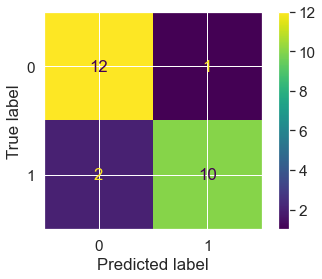

In [196]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

The f1 score for the testing data: 0.0


C:\Users\New User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


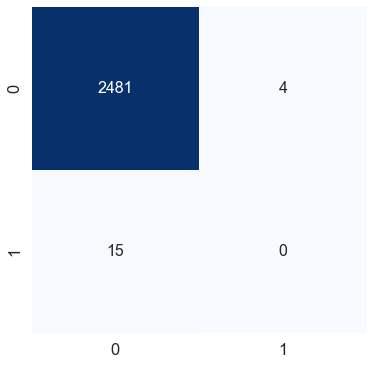

In [217]:
#Import and training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

#Test data prediction
pred_test = lr.predict(X_test)

#Calculate and print the F1 score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Function to create confusion matrix
def conf_matrix(y_test, pred_test):    
    
    #Create confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Call function
conf_matrix(y_test, pred_test)

The f1 score for the testing data: 0.06818181818181818


C:\Users\New User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


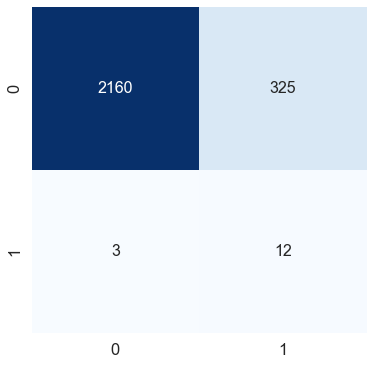

In [218]:
#Import and training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

#Test data prediction
pred_test = lr.predict(X_test)

#Calculate and print the F1 score
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Function to create confusion matrix
def conf_matrix(y_test, pred_test):    
    
    #Create confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Call function
conf_matrix(y_test, pred_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\New User\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\New User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

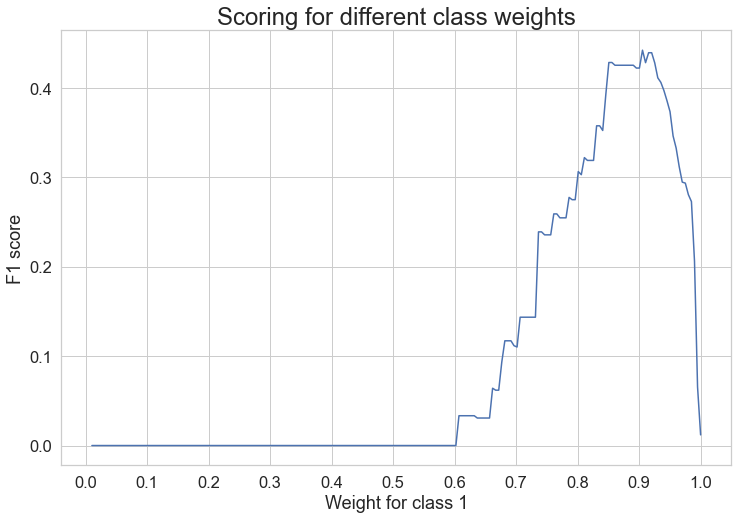

In [219]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Set the range of class weights
weights = np.linspace(0.0,0.99,200)

#Create dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

##Fitting training data with 5 times grid search method
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Draw fractions with different weight values
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [221]:
plt.savefig("C:/Users/New User/Desktop/Fraud/f1_weights.png")

<Figure size 432x288 with 0 Axes>